### 3.1. Coin flipping example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# two possible values
# 0: Heads
# 1: Tails
np.random.choice([0,1])

0

In [3]:
# five coin flips
np.random.choice([0,1],size=5)

array([0, 0, 0, 0, 1])

In [4]:
# 10 runs
observations = np.random.choice([0,1],size=10)

In [5]:
observations

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0])

In [6]:
odds_tails = 100 * observations.sum() / len(observations)  # number of times we observed 1's / total tosses
odds_heads = 100 - odds_tails
print(odds_tails)
print(odds_heads)

40.0
60.0


In [7]:
runs = [1, 10, 100, 1000, 10000]
for run in runs:
    observations = np.random.choice([0,1],size=run)
    odds_tails = 100 * observations.sum() / len(observations)  # number of times we observed 1's / total tosses
    odds_heads = 100 - odds_tails
    print("After ",run, " runs - odds of seeing heads is ", odds_heads)

After  1  runs - odds of seeing heads is  100.0
After  10  runs - odds of seeing heads is  70.0
After  100  runs - odds of seeing heads is  45.0
After  1000  runs - odds of seeing heads is  54.0
After  10000  runs - odds of seeing heads is  50.42


#### 3.1.1. Coin flipping example with sequential combinations

In [8]:
one_sequence = np.random.choice([0,1],size=3)
print(one_sequence)

[0 1 0]


#### 3.1.2. Slow running code

In [9]:
counter = 0
num_of_runs = 10
for i in range(num_of_runs):
    one_sequence = np.random.choice([0,1],size=3)
    if one_sequence.sum() == 0:
        counter = counter + 1
p=counter/num_of_runs
print("Number of runs:", num_of_runs, " - P(Heads,Heads,Heads)", p)
    

Number of runs: 10  - P(Heads,Heads,Heads) 0.1


In [10]:
# copy/pasted from above - slow version
counter = 0
num_of_runs = 1000000
for i in range(num_of_runs):
    one_sequence = np.random.choice([0,1],size=3)
    if one_sequence.sum() == 0:
        counter = counter + 1
p=counter/num_of_runs
print("Number of runs:", num_of_runs, " - P(Heads,Heads,Heads)", p)

Number of runs: 1000000  - P(Heads,Heads,Heads) 0.124826


In [11]:
all_runs = np.random.randint(0,2,size=(10,3))

In [12]:
print(all_runs)

[[0 0 0]
 [0 1 1]
 [1 0 0]
 [0 1 1]
 [1 1 1]
 [0 0 1]
 [0 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 1]]


In [13]:
counts = all_runs.sum(1)

In [14]:
zero_counts = counts==0

In [15]:
zero_counts.sum()

2

In [16]:
p = zero_counts.sum() / 10
print(p)

0.2


#### 3.1.3. Faster running code

In [17]:
# faster version
num_of_runs = 100000000

entire_runs = np.random.choice([0,1],size=(num_of_runs,3))
entire_runs_count = entire_runs.sum(1)
count_of_HHH = (entire_runs_count == 0).sum()
p=count_of_HHH/num_of_runs
print("Number of runs:", num_of_runs, " - P(Heads,Heads,Heads)", p)
    

Number of runs: 100000000  - P(Heads,Heads,Heads) 0.12500933


### 3.2. The Pi number example

In [18]:
r = 1
# first location randomly set
x = np.random.uniform(-r,r)
y = np.random.uniform(-r,r)
print(x,y)

-0.4664022628726703 -0.9065451138461


In [19]:
import math
# if the distance to the center is lower than radius, it means the dart is within the circle
length = math.sqrt(x ** 2 + y ** 2)

In [20]:
print(length)

1.0194876724369872


In [21]:
# many runs....
runs = [10, 100, 1000, 10000, 100000]

for run in runs:
    count = 0
    
    for i in range(run):
        x = np.random.uniform(-r,r)
        y = np.random.uniform(-r,r)
        length = math.sqrt(x ** 2 + y ** 2)
        if length < r:
            count = count + 1
    
    p =  count / run
    # divided it by 4 to estimate the pi number
    pi =  p * 4
    #print("Ratio of darts inside circle:", p)
    print("Estimated pi value for ",run, " runs: ", pi)

Estimated pi value for  10  runs:  2.8
Estimated pi value for  100  runs:  2.8
Estimated pi value for  1000  runs:  3.088
Estimated pi value for  10000  runs:  3.1192
Estimated pi value for  100000  runs:  3.14476


### 3.3. Yahtzee example

In [22]:
def yahtzee():
    number_of_dice_kept = 0
    value_we_keep = 0

    for i in range(3):
        dice = np.random.randint(1,7,size=5-number_of_dice_kept)

        if value_we_keep > 0:
            for die in dice:
                if die == value_we_keep:
                    number_of_dice_kept = number_of_dice_kept + 1
        else:
            counts = np.zeros(6)
            for die in dice:
                counts[die-1] += 1

            number_of_dice_kept = int(counts.max())
            if number_of_dice_kept == 1:
                value_we_keep = 0
                number_of_dice_kept = 0
            else:
                value_we_keep = counts.argmax() + 1
    # option 1
    return number_of_dice_kept == 5 
    
    # Option 2
    # if number_of_dice_kept == 5:
    #     return True
    # else:
    #     return False
        

In [23]:
# monte carlo simulation
N=100000
number_of_yahtzee_scores = 0

for i in range(N):
    outcome = yahtzee()
    if outcome == True:
        number_of_yahtzee_scores = number_of_yahtzee_scores + 1

print("Ratio:", number_of_yahtzee_scores/N)
print("Percentage:", 100 * number_of_yahtzee_scores/N)

Ratio: 0.04506
Percentage: 4.506


### 3.4. Determining number of runs (N)

#### N=100

In [24]:
# 11/18/2019 lecture slide #7
N=100 # step 1
all_results_100 = []

for j in range(100): # step 5
    np.random.seed(j) # step 2

    number_of_yahtzee_scores = 0

    for i in range(N): # Step 3
        outcome = yahtzee()
        if outcome == True:
            number_of_yahtzee_scores = number_of_yahtzee_scores + 1

    estimated_result = number_of_yahtzee_scores/N # step 4
    all_results_100.append(estimated_result)

print(all_results_100)

[0.08, 0.04, 0.03, 0.01, 0.03, 0.04, 0.06, 0.03, 0.03, 0.06, 0.03, 0.02, 0.01, 0.08, 0.05, 0.02, 0.02, 0.01, 0.02, 0.05, 0.04, 0.05, 0.05, 0.05, 0.04, 0.05, 0.08, 0.07, 0.06, 0.07, 0.03, 0.05, 0.03, 0.04, 0.03, 0.06, 0.04, 0.03, 0.08, 0.07, 0.06, 0.08, 0.05, 0.06, 0.04, 0.06, 0.08, 0.06, 0.03, 0.05, 0.08, 0.02, 0.02, 0.04, 0.06, 0.06, 0.05, 0.04, 0.06, 0.04, 0.06, 0.02, 0.05, 0.07, 0.05, 0.02, 0.02, 0.05, 0.05, 0.08, 0.06, 0.03, 0.05, 0.02, 0.01, 0.02, 0.05, 0.09, 0.1, 0.03, 0.09, 0.02, 0.05, 0.03, 0.03, 0.03, 0.04, 0.05, 0.06, 0.09, 0.04, 0.07, 0.05, 0.04, 0.03, 0.05, 0.08, 0.03, 0.07, 0.03]


(array([ 4., 12., 18., 13., 20., 14.,  6.,  9.,  3.,  1.]),
 array([0.01 , 0.019, 0.028, 0.037, 0.046, 0.055, 0.064, 0.073, 0.082,
        0.091, 0.1  ]),
 <a list of 10 Patch objects>)

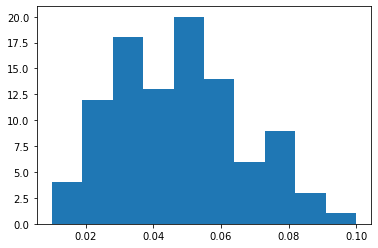

In [25]:
plt.hist(all_results_100)

#### N=1000

[0.047, 0.044, 0.043, 0.042, 0.04, 0.043, 0.044, 0.046, 0.037, 0.044, 0.049, 0.036, 0.035, 0.045, 0.035, 0.04, 0.048, 0.044, 0.052, 0.043, 0.041, 0.048, 0.047, 0.04, 0.054, 0.047, 0.053, 0.043, 0.043, 0.05, 0.043, 0.04, 0.046, 0.049, 0.051, 0.037, 0.05, 0.05, 0.051, 0.046, 0.044, 0.053, 0.048, 0.044, 0.058, 0.046, 0.05, 0.056, 0.038, 0.056, 0.051, 0.052, 0.042, 0.044, 0.045, 0.05, 0.047, 0.046, 0.044, 0.047, 0.036, 0.04, 0.036, 0.034, 0.043, 0.053, 0.038, 0.053, 0.055, 0.045, 0.057, 0.04, 0.045, 0.04, 0.038, 0.041, 0.046, 0.051, 0.058, 0.053, 0.04, 0.053, 0.047, 0.041, 0.044, 0.045, 0.044, 0.053, 0.046, 0.046, 0.055, 0.042, 0.048, 0.044, 0.055, 0.056, 0.047, 0.042, 0.049, 0.047]


(array([ 6.,  5., 11., 11., 16., 20.,  8., 13.,  4.,  6.]),
 array([0.034 , 0.0364, 0.0388, 0.0412, 0.0436, 0.046 , 0.0484, 0.0508,
        0.0532, 0.0556, 0.058 ]),
 <a list of 10 Patch objects>)

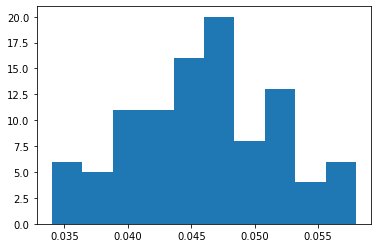

In [26]:
# 11/18/2019 lecture slide #7
N=1000 # step 1
all_results_1000 = []

for j in range(100): # step 5
    np.random.seed(j) # step 2

    number_of_yahtzee_scores = 0

    for i in range(N): # Step 3
        outcome = yahtzee()
        if outcome == True:
            number_of_yahtzee_scores = number_of_yahtzee_scores + 1

    estimated_result = number_of_yahtzee_scores/N # step 4
    all_results_1000.append(estimated_result)

print(all_results_1000)
plt.hist(all_results_1000)

In [27]:
# step 6 - calculating the standard deviation
standard_dev_100 = np.std(all_results_100)
print("Standard deviation for N=100:",standard_dev_100)

standard_dev_1000 = np.std(all_results_1000)
print("Standard deviation for N=1000:",standard_dev_1000)

Standard deviation for N=100: 0.020961631615883335
Standard deviation for N=1000: 0.005692547760010451


In [28]:
# calculating the confidence interval
mean_100 = np.mean(all_results_100) 
print(mean_100)

mean_1000 = np.mean(all_results_1000) 
print(mean_1000)

0.04690000000000001
0.04592999999999999


In [29]:
lower_bound_of_confidence_interval_100 = mean_100 - 1.96*standard_dev_100
upper_bound_of_confidence_interval_100 = mean_100 + 1.96*standard_dev_100

In [30]:
# if we use N=100
print("95% of the time, values will fall within ",lower_bound_of_confidence_interval_100,",",upper_bound_of_confidence_interval_100)

95% of the time, values will fall within  0.0058152020328686715 , 0.08798479796713135


In [31]:
lower_bound_of_confidence_interval_1000 = mean_1000 - 1.96*standard_dev_1000
upper_bound_of_confidence_interval_1000 = mean_1000 + 1.96*standard_dev_1000

In [32]:
# if we use N=1000
print("95% of the time, values will fall within ",lower_bound_of_confidence_interval_1000,",",upper_bound_of_confidence_interval_1000)

95% of the time, values will fall within  0.034772606390379504 , 0.05708739360962048


#### 3.4.1. Compact version

In [33]:
def monte_carlo_run(N,number_of_repeats):
    all_results = []

    for j in range(number_of_repeats): # step 5
        np.random.seed(j) # step 2

        number_of_yahtzee_scores = 0

        for i in range(N): # Step 3
            outcome = yahtzee()
            if outcome == True:
                number_of_yahtzee_scores = number_of_yahtzee_scores + 1

        estimated_result = number_of_yahtzee_scores/N # step 4
        all_results.append(estimated_result)

    return all_results

In [34]:
results = monte_carlo_run(N=1000, number_of_repeats=1000)

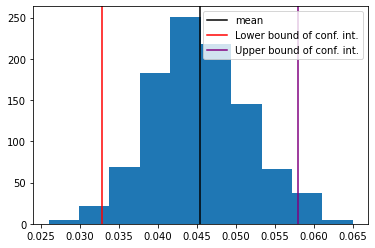

In [35]:
mean = np.mean(results)
std = np.std(results)
plt.hist(results)
plt.axvline(x=mean,color="black",label="mean")
plt.axvline(x=mean-1.96*std,color="red",label="Lower bound of conf. int.")
plt.axvline(x=mean+1.96*std,color="purple",label="Upper bound of conf. int.")
plt.legend()
plt.show()

### 3.5. Monty Hall problem

In [36]:
# identify a random door with prize
doors = [1,2,3]
prize = np.random.choice(doors)
print("The door with prize:", prize)

The door with prize: 1


In [37]:
# make a choice
choice = np.random.choice(doors)
print("The door we chose:", choice)

The door we chose: 2


In [38]:
set(doors)

{1, 2, 3}

In [39]:
doors_with_no_prize_and_unchosen = set(doors)-set([choice,prize])
print(doors_with_no_prize_and_unchosen)

{3}


In [40]:
the_door_opened_by_host = np.random.choice(list(doors_with_no_prize_and_unchosen))
print(the_door_opened_by_host)

3


In [41]:
#  Strategy 1: we stick with current one
if prize == choice:
    print("You won")
else:
    print("You lost")

You lost


In [42]:
# Strategy 2: we change our mind and choose the other one
new_choice = set(doors) - set([the_door_opened_by_host]) - set([choice])
print(new_choice)
new_choice_int = list(new_choice)[0]

# we stick with current one
if prize == new_choice_int:
    print("You won")
else:
    print("You lost")

{1}
You won


#### 3.5.1. Compact version of Monty Hall problem

In [43]:
def monty_hall(strategy):
    # identify a random door with prize
    doors = [1,2,3]
    prize = np.random.choice(doors)
    
    # make a choice
    choice = np.random.choice(doors)
    
    doors_with_no_prize_and_unchosen = set(doors)-set([choice,prize])
    
    the_door_opened_by_host = np.random.choice(list(doors_with_no_prize_and_unchosen))

    # if the function returns True, that means, you win
    #                       if False, you lose
    if strategy == 1: # stick with current choice
        return prize == choice
    
    elif strategy == 2: # change the choice
        new_choice = set(doors) - set([the_door_opened_by_host]) - set([choice])
        new_choice_int = list(new_choice)[0]
        
        return prize == new_choice_int


#### 3.5.2. Test two strategies

In [44]:
monty_hall(1)

True

In [45]:
N = 1000
count_wins = 0

for i in range(N):
    result = monty_hall(1)
    
    if result == True:
        count_wins = count_wins + 1
print("Strategy 1")
print(100*count_wins/N)

Strategy 1
35.5


In [46]:
N = 1000
count_wins = 0

for i in range(N):
    result = monty_hall(2)
    
    if result == True:
        count_wins = count_wins + 1
print("Strategy 2")
print(100*count_wins/N)

Strategy 2
69.9
